## Visualize Annual Corn Harvests by State

This notebook creates time series plots and other visualizations of annual corn acres harvested using USDA NASS data from 1866-2025.

Click the badge below to open in Google Colab:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chuckgrigsby0/agec-784/blob/main/notebooks/07_plot_annual_corn_acres_harvested_by_state.ipynb)

## Data Loading

Import necessary libraries and load the corn harvest dataset.

In [21]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub repository
base_url = "https://raw.githubusercontent.com/chuckgrigsby0/agec-784/main/data/"
corn_acres = pd.read_csv(base_url + 'corn_acres_harvested_by_state_raw.csv')

### Data Cleaning

Handle missing or special values in the 'Value' column. 

In [22]:
value_clean = corn_acres['Value'].fillna('').astype(str)

# Remove any row containing (D) or (Z) anywhere
mask = value_clean.str.contains(r'\([DZ]\)', regex=True)
corn_acres_clean = corn_acres[~mask].copy()

# Remove ',' from `Value` column
corn_acres['Value'] = (
    corn_acres['Value']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)
# Convert to numeric
corn_acres['Value'] = pd.to_numeric(corn_acres['Value'], errors='coerce')

# Check for NAs
corn_acres['Value'].isna().sum()

# Optional: Drop NAs if needed
# corn_acres.dropna(subset=['Value'], inplace=True) 

np.int64(0)

## Data Exploration

Examine the structure and content of the corn harvest data.

In [23]:
# Display column names to understand data structure
print(corn_acres.columns.tolist())

['year', 'state_name', 'reference_period_desc', 'freq_desc', 'unit_desc', 'sector_desc', 'class_desc', 'commodity_desc', 'short_desc', 'group_desc', 'statisticcat_desc', 'Value']


In [24]:
# Preview first few rows
print(corn_acres.head())

   year state_name reference_period_desc freq_desc unit_desc sector_desc  \
0  2025    ALABAMA                  YEAR    ANNUAL     ACRES       CROPS   
1  2024    ALABAMA                  YEAR    ANNUAL     ACRES       CROPS   
2  2023    ALABAMA                  YEAR    ANNUAL     ACRES       CROPS   
3  2022    ALABAMA                  YEAR    ANNUAL     ACRES       CROPS   
4  2021    ALABAMA                  YEAR    ANNUAL     ACRES       CROPS   

    class_desc commodity_desc                     short_desc   group_desc  \
0  ALL CLASSES           CORN  CORN, GRAIN - ACRES HARVESTED  FIELD CROPS   
1  ALL CLASSES           CORN  CORN, GRAIN - ACRES HARVESTED  FIELD CROPS   
2  ALL CLASSES           CORN  CORN, GRAIN - ACRES HARVESTED  FIELD CROPS   
3  ALL CLASSES           CORN  CORN, GRAIN - ACRES HARVESTED  FIELD CROPS   
4  ALL CLASSES           CORN  CORN, GRAIN - ACRES HARVESTED  FIELD CROPS   

  statisticcat_desc   Value  
0    AREA HARVESTED  340000  
1    AREA HARVESTED 

In [25]:
# Check which states are included in dataset
print(corn_acres['state_name'].unique())

['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'FLORIDA' 'GEORGIA' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA'
 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS'
 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA'
 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [26]:
# Generate summary statistics
np.round(corn_acres.describe(), decimals=2)

,year,Value
count,6955.00,6955.00
mean,1944.96,1724784.04
std,44.83,2516465.28
min,1866.00,1000.00
25%,1907.00,62000.00
50%,1943.00,627000.00
75%,1983.00,2380500.00
max,2025.00,13900000.00


In [27]:
# Verify data frequency (should be annual)
print(corn_acres['freq_desc'].unique())

['ANNUAL']


## Data Preparation

Convert acres to millions for better readability in visualizations.

In [28]:
# Convert acres to millions for easier interpretation in plots
corn_acres = corn_acres.assign( 
    acres_harvest=lambda x: x['Value'] / 1_000_000
)

## Visualizations

Set visualization style and create plots.

In [29]:
# Set the style for seaborn plots
# 'whitegrid' provides a clean background with subtle gridlines
sns.set_style('whitegrid')

### Single-State Line Plot

Visualize Tennessee's corn harvest trends over time.

Documentation: [Seaborn Line Plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [30]:
# Filter data for Tennessee
tn_corn = corn_acres.loc[corn_acres['state_name'] == 'TENNESSEE']

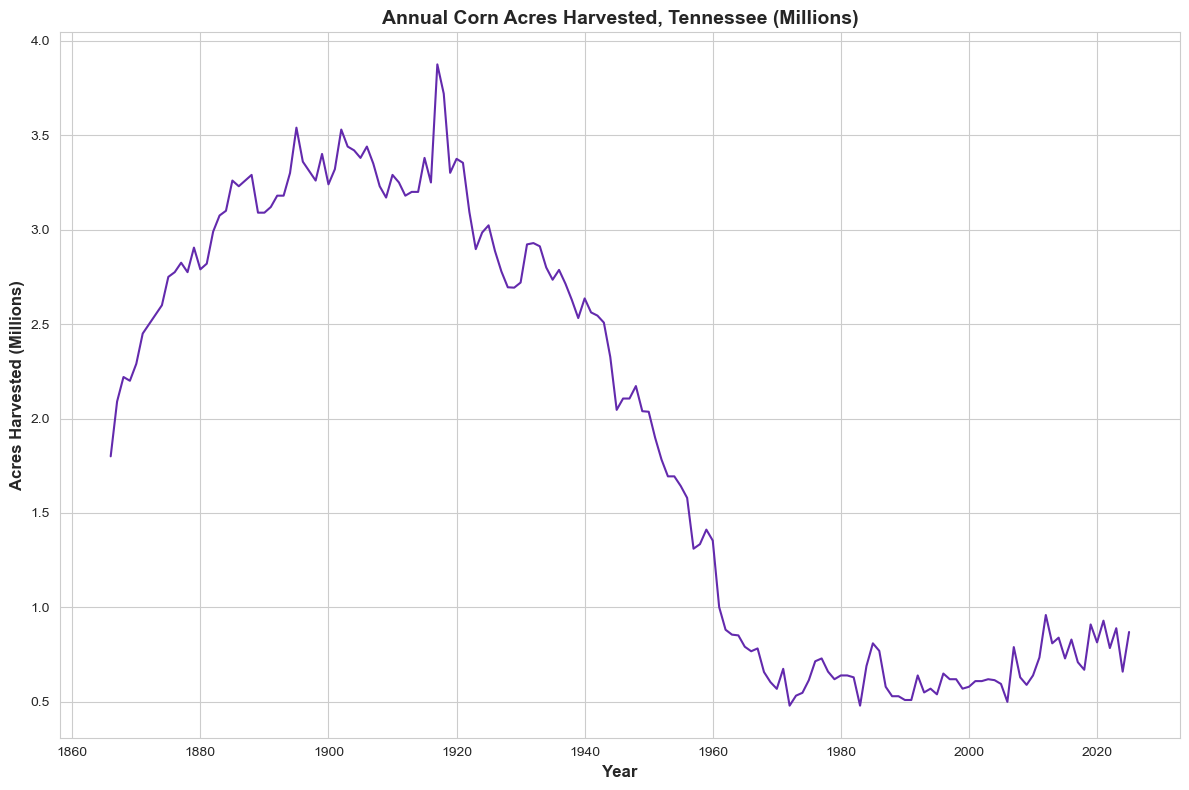

In [31]:
# Create figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# Select color from CMRmap palette for visual consistency
cmr_pal = sns.color_palette(palette='CMRmap')

# Create line plot
tn_lp = sns.lineplot(
    data=tn_corn,
    x='year',
    y='acres_harvest',
    color=cmr_pal[1]  # Use second color from palette
)

# Disable scientific notation on y-axis
# ax.ticklabel_format(style='plain', axis='y')

# Set x-axis to span full data range
# ax.set_xlim(tn_corn['year'].min(), tn_corn['year'].max())

# Ensure first and last years appear on x-axis
# min_year = tn_corn['year'].min()
# max_year = tn_corn['year'].max()
# current_ticks = ax.get_xticks()
# ticks = sorted(set([min_year] + list(current_ticks) + [max_year]))
# ticks = [t for t in ticks if min_year <= t <= max_year]
# ax.set_xticks(ticks)

# Add labels and title
plt.title("Annual Corn Acres Harvested, Tennessee (Millions)", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12, weight='bold')
plt.ylabel("Acres Harvested (Millions)", fontsize=12, weight='bold')

plt.tight_layout()
tn_lp;

### Multi-State Line Plot

Compare corn harvest trends across select Southern states.

In [32]:
# Display all available states for reference
print(corn_acres['state_name'].unique())

['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'FLORIDA' 'GEORGIA' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA'
 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS'
 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA'
 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [33]:
# Select Southern states for regional comparison
select_states = ['MISSISSIPPI', 'ALABAMA', 'GEORGIA', 'FLORIDA', 'SOUTH CAROLINA', 'NORTH CAROLINA', 'TENNESSEE', 'KENTUCKY']

In [34]:
# Filter data to selected states only
corn_acres_sel_states = corn_acres.loc[corn_acres['state_name'].isin(select_states)]
# Convert state names to title case for all visualizations
corn_acres_sel_states = corn_acres_sel_states.assign(
    state_name=corn_acres_sel_states['state_name'].str.title()
)

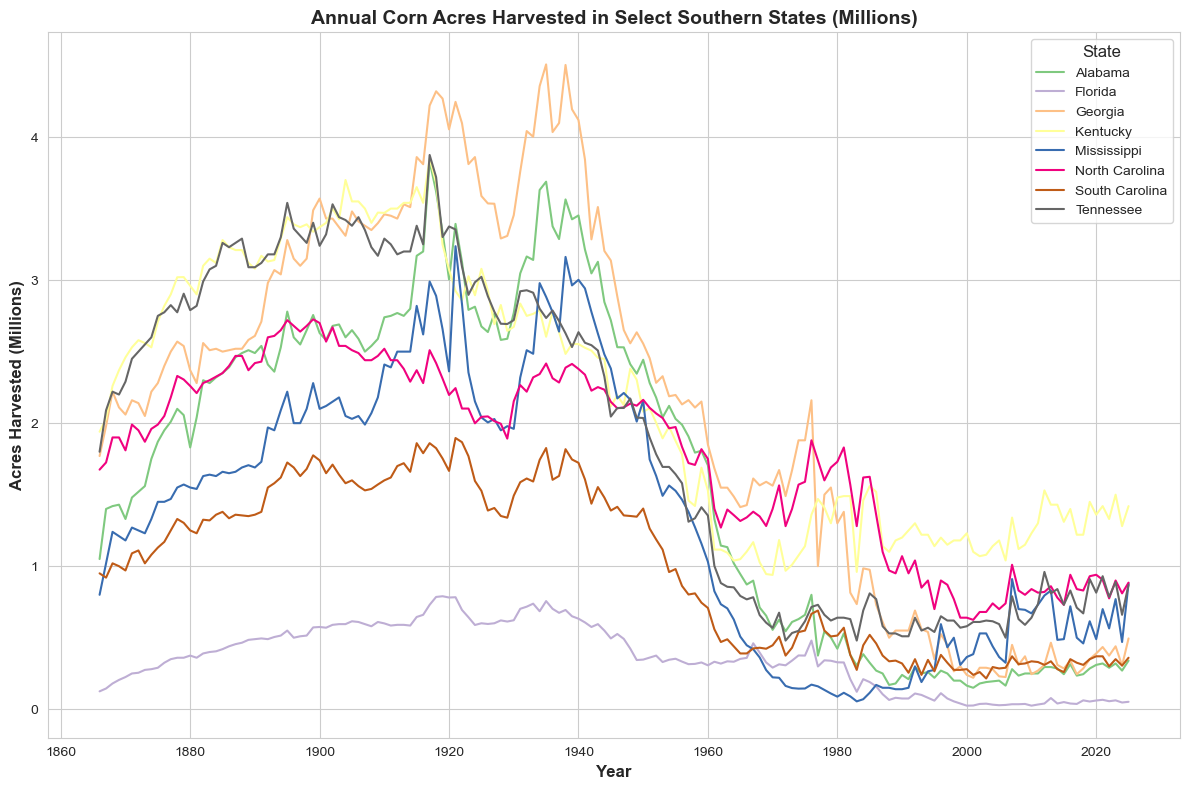

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

multi_state_lnp = sns.lineplot(
    data=corn_acres_sel_states, 
    x='year', 
    y='acres_harvest', 
    hue='state_name',
    palette='Accent'
)

# Customize the legend
handles, labels = ax.get_legend_handles_labels()

ax.legend(
    handles=handles,
    labels=labels,
    title='State',  # Clear legend title
    title_fontsize=12,  # Match plot styling
    fontsize=10,  # Readable label size
    loc='best',  # Let matplotlib find optimal position
    frameon=True,  # Show frame
    fancybox=True  # Rounded corners for aesthetic appeal
)

# Add titles and axis labels
plt.title("Annual Corn Acres Harvested in Select Southern States (Millions)", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12, weight='bold')
plt.ylabel("Acres Harvested (Millions)", fontsize=12, weight='bold')

plt.tight_layout()
multi_state_lnp;

### Bar Plot by State

Show corn acres harvested by state for the most recent year (2025).

Documentation: [Seaborn Bar Plot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [36]:
# Get most recent year in dataset
max_year = int(corn_acres['year'].max())
# Filter to most recent year only
corn_by_state = corn_acres.loc[corn_acres['year'] == max_year]

In [37]:
# Convert state names to title case for readability
corn_by_state = corn_by_state.assign(state_name=corn_by_state['state_name'].str.title())
# Sort by harvest amount for ordered visualization
corn_by_state = corn_by_state.sort_values(by='acres_harvest', ascending=True)

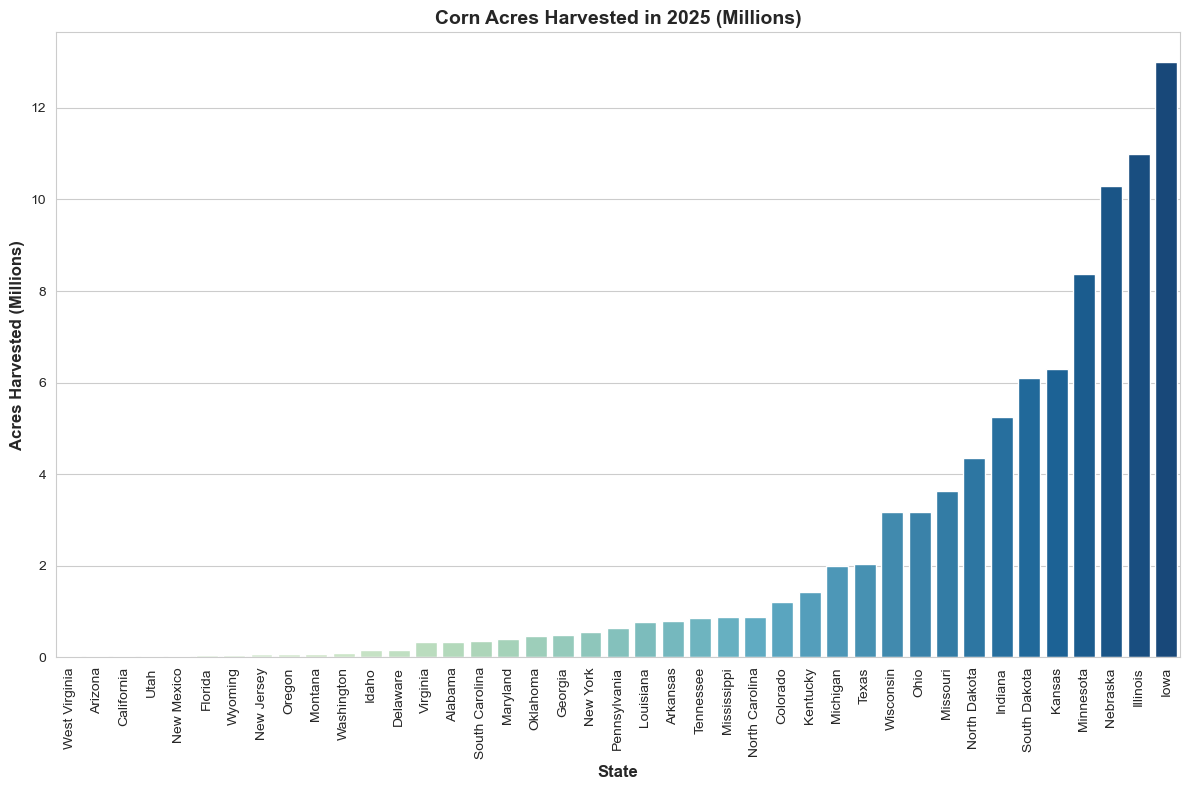

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

sns.barplot(
    data=corn_by_state,
    x='state_name', 
    y='acres_harvest', 
    hue='state_name',
    palette='GnBu',
    legend=False  # Disable legend for cleaner look
)

# Add titles and axis labels
plt.title("Corn Acres Harvested in 2025 (Millions)", fontsize=14, weight='bold')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("State", fontsize=12, weight='bold')
plt.ylabel("Acres Harvested (Millions)", fontsize=12, weight='bold')

plt.tight_layout()

### Box Plot Distribution

Display distribution of corn harvest over time for selected states (1866-2025).

Documentation: [Seaborn Box Plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

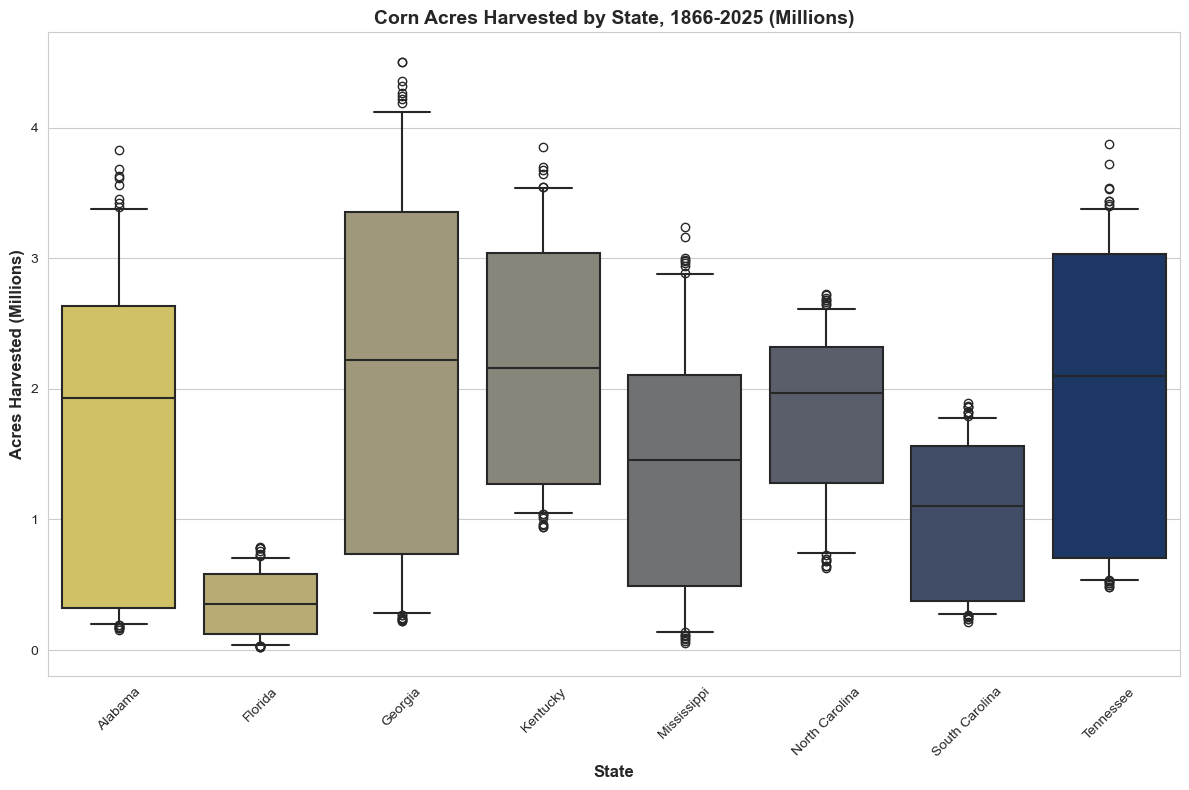

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

sns.boxplot(
    data=corn_acres_sel_states,
    x='state_name', 
    y='acres_harvest',
    hue='state_name', 
    palette='cividis_r',
    fill=True, 
    whis=(5, 95),  # Whiskers extend to 5th and 95th percentiles (not min/max)
    linewidth=1.5  # Controls box border thickness and whisker lines
)

# Add titles and axis labels
plt.title("Corn Acres Harvested by State, 1866-2025 (Millions)", fontsize=14, weight='bold')
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("State", fontsize=12, weight='bold')
plt.ylabel("Acres Harvested (Millions)", fontsize=12, weight='bold')

plt.tight_layout()